In [1]:
# Load modules
%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots
from mpl_toolkits.basemap import Basemap # plot on map projections
from os.path import expanduser
home = expanduser("~") # Get users home directory
import os # operating system interface
import scipy as sp
import xarray as xr
from xarray.ufuncs import square, sqrt
import scipy.interpolate
import scipy.ndimage
#import seawater as sw

Populating the interactive namespace from numpy and matplotlib


In [2]:
#vgrid_file ='/g/data3/hh5/tmp/pas561/gfdl_nyf_1080/ocean.ncra501-520.nc'
vgrid_file ='/g/data/v45/pas561/mom/archive/wombat_jun16z/output1981/ocean__1980_07.nc'

nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
sw_ocean = nc.variables['sw_ocean'][:]
st_ocean = nc.variables['st_ocean'][:]
yt_ocean = nc.variables['yt_ocean'][:]
yu_ocean = nc.variables['yu_ocean'][:]
xt_ocean = nc.variables['xt_ocean'][:]
potrho = nc.variables['potrho'][:]
nc.close() # close the file
#print st_ocean.shape
#print potrho.shape
#print yt_ocean.shape

In [3]:
NYFCntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z/'

#of=os.path.join(NYFCntrlDir,'cntrl_gmocs.npy')
of=os.path.join(NYFCntrlDir,'gmoc_adv_rho.npy')
np_cntrl_gmoc=np.load(of)
print np_cntrl_gmoc.shape

of=os.path.join(NYFCntrlDir,'gmoc_gm_rho.npy')
np_cntrl_gmoc_gm=np.load(of)
print np_cntrl_gmoc_gm.shape

#add 10 year mean GM to adv cntrl 
np_cntrl_gmoc_net=np_cntrl_gmoc[:,:,:]+np.mean(np_cntrl_gmoc_gm[:,:,:],axis=0)
print(np_cntrl_gmoc_net.shape)

(49, 80, 1080)
(9, 80, 1080)
(49, 80, 1080)


In [4]:
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/'

#load gmoc in rho space
of=os.path.join(NYFPertDir,'gmoc_adv_rho.npy')
np_pert_gmoc=np.load(of)
print np_pert_gmoc.shape

of=os.path.join(NYFPertDir,'gmoc_gm_rho.npy')
np_pert_gmoc_gm=np.load(of)
print np_pert_gmoc_gm.shape

np_pert_gmoc_net=np_pert_gmoc[:,:,:]+np.mean(np_pert_gmoc_gm[:,:,:],axis=0)
print(np_pert_gmoc_net.shape)

(44, 80, 1080)
(44, 80, 1080)
(44, 80, 1080)


In [28]:
z1=np.argwhere(potrho<=1036.8125)
z1=np.asscalar(z1[-1])
print(potrho[z1])

ts=np_cntrl_gmoc_net.shape
ts=ts[0]

yrs=np.arange(1973,2017,1)

# do lower cell average between lats 60-70S
j1=np.argwhere(yt_ocean<-65.5)
j2=np.argwhere(yt_ocean<-64.5)
j1=np.asscalar(j1[-1])
j2=np.asscalar(j2[-1])
print(j1,j2,yt_ocean[j1])

lc_cntrl60_psj = np_cntrl_gmoc_net[:,z1:,j1:j2]
np_lc_cntrl60_psj_ts = np.min(np.min(lc_cntrl60_psj,2),1)

lc_pert60_psj = np_pert_gmoc_net[:,z1:,j1:j2]
np_lc_pert60_psj_ts = np.min(np.min(lc_pert60_psj,2),1)

# do lower cell average between lats 60-70S
j1=np.argwhere(yu_ocean<-55.5)
j2=np.argwhere(yu_ocean<-54.5)
j1=np.asscalar(j1[-1])
j2=np.asscalar(j2[-1])
print(yu_ocean[j1:j2])

lc_cntrl50_psj = np_cntrl_gmoc_net[:,z1:,j1:j2]
np_lc_cntrl50_psj_ts = np.min(np.min(lc_cntrl50_psj,2),1)

lc_pert50_psj = np_pert_gmoc_net[:,z1:,j1:j2]
np_lc_pert50_psj_ts = np.min(np.min(lc_pert50_psj,2),1)

1036.8125
(147, 156, -65.55400822071402)
[-55.63569928 -55.49433206 -55.35245561 -55.21006898 -55.06717121
 -54.92376135 -54.77983848]


In [6]:
NYFCntrlDir = '/g/data/hh5/tmp/pas561/kds75_cp_ann/'
of=os.path.join(NYFCntrlDir,'gmoc_adv_rho_ann_114to155.npy') #was pertdir 154.npy ... bug?
cntrl_gmoc_ann=np.load(of)
print(cntrl_gmoc_ann.shape)

(42, 80, 2700)


In [7]:
NYFPertDir = '/g/data/hh5/tmp/pas561/kds75_wp2/2yr/'#/g/data/hh5/tmp/pas561/kds75_wp2/2yr/'
of=os.path.join(NYFPertDir,'gmoc_adv_rho_ann_114to154.npy')
pert_gmoc_ann=np.load(of)
print(pert_gmoc_ann.shape)

(41, 80, 2700)


In [8]:
vgrid_file='/g/data/hh5/tmp/pas561/kds75_wp2/2yr/ocean_114.nc'
nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
yu_ocean2 = nc.variables['yu_ocean'][:]
potrho2 = nc.variables['potrho'][:]
nc.close() # close the file

In [9]:

z1=np.argwhere(potrho2<=1036.8125)
#print potrho[z1]
z1=np.asscalar(z1[-1])
#print potrho[z1]

ts=pert_gmoc_ann.shape
ts=ts[0]
#print ts

# do lower cell average between lats 60-70S
j1=np.argwhere(yu_ocean2<-65.5)
j2=np.argwhere(yu_ocean2<-64.5)
j1=np.asscalar(j1[-1])
j2=np.asscalar(j2[-1])
#print yt_ocean[j1:j2]

lc_cntrl60_psj = cntrl_gmoc_ann[:,z1:,j1:j2]
mom01_lc_cntrl60_psj_ts = np.min(np.min(lc_cntrl60_psj,2),1)

lc_pert60_psj = pert_gmoc_ann[:,z1:,j1:j2]
mom01_lc_pert60_psj_ts = np.min(np.min(lc_pert60_psj,2),1)

# do lower cell average between lats 60-70S
j1=np.argwhere(yu_ocean2<-55.5)
j2=np.argwhere(yu_ocean2<-54.5)
j1=np.asscalar(j1[-1])
j2=np.asscalar(j2[-1])
#print yt_ocean[j1:j2]

lc_cntrl50_psj = cntrl_gmoc_ann[:,z1:,j1:j2]
mom01_lc_cntrl50_psj_ts = np.min(np.min(lc_cntrl50_psj,2),1)

lc_pert50_psj = pert_gmoc_ann[:,z1:,j1:j2]
mom01_lc_pert50_psj_ts = np.min(np.min(lc_pert50_psj,2),1)

In [10]:
pert025_60to20E=np.load('/g/data/jk72/pas561/jnb/WedPolyFinal/ty_trans_pert025_60to20E.npy')
cntrl025_60to20E=np.load('/g/data/jk72/pas561/jnb/WedPolyFinal/ty_trans_cntrl025_60to20E.npy')
pert025_60to10=np.load('/g/data/jk72/pas561/jnb/WedPolyFinal/ty_trans_pert025_60to10.npy')
cntrl025_60to10=np.load('/g/data/jk72/pas561/jnb/WedPolyFinal/ty_trans_cntrl025_60to10.npy')

pert01_60to20E=np.load('/g/data/jk72/pas561/jnb/WedPolyFinal/ty_trans_pert01_60to20E.npy')
cntrl01_60to20E=np.load('/g/data/jk72/pas561/jnb/WedPolyFinal/ty_trans_cntrl01_60to20E.npy')
pert01_60to10=np.load('/g/data/jk72/pas561/jnb/WedPolyFinal/ty_trans_pert01_60to10.npy')
cntrl01_60to10=np.load('/g/data/jk72/pas561/jnb/WedPolyFinal/ty_trans_cntrl01_60to10.npy')

In [11]:
print(cntrl01_60to20E.shape,pert01_60to20E.shape)
pert01_60to20E=np.append(cntrl01_60to20E[0],pert01_60to20E)
print(cntrl01_60to20E.shape,pert01_60to20E.shape)

print(cntrl025_60to20E.shape,pert025_60to20E.shape)
pert025_60to20E=np.append(cntrl025_60to20E[0],pert025_60to20E)
print(cntrl025_60to20E.shape,pert025_60to20E.shape)


((42,), (41,))
((42,), (42,))
((57,), (51,))
((57,), (52,))


In [12]:
print(cntrl01_60to10.shape,pert01_60to10.shape)
pert01_60to10=np.append(cntrl01_60to10[0],pert01_60to10)
print(cntrl01_60to10.shape,pert01_60to10.shape)

print(cntrl025_60to10.shape,pert025_60to10.shape)
pert025_60to10=np.append(cntrl025_60to10[0],pert025_60to10)
print(cntrl025_60to10.shape,pert025_60to10.shape)


((42,), (41,))
((42,), (42,))
((57,), (51,))
((57,), (52,))


In [13]:
np_cntrl_wg_ts=np.load('/g/data/jk72/pas561/jnb/WedPolyFinal/mom025_cntrl_wg_ts.npy')
np_pert_wg_ts=np.load('/g/data/jk72/pas561/jnb/WedPolyFinal/mom025_pert_wg_ts.npy')
cntrl_wg_ts=np.load('/g/data/jk72/pas561/jnb/WedPolyFinal/mom01_cntrl_wg_ts.npy')
pert_wg_ts=np.load('/g/data/jk72/pas561/jnb/WedPolyFinal/mom01_pert_wg_ts.npy')

In [14]:
print(np_cntrl_wg_ts.shape,np_pert_wg_ts.shape)
np_pert_wg_ts=np.append(np_cntrl_wg_ts[0],np_pert_wg_ts[:-1])
print(np_cntrl_wg_ts.shape,np_pert_wg_ts.shape)

print(cntrl_wg_ts.shape,pert_wg_ts.shape)
pert_wg_ts=np.append(cntrl_wg_ts[0],pert_wg_ts[:-1])
print(cntrl_wg_ts.shape,pert_wg_ts.shape)

((49,), (44,))
((49,), (44,))
((44,), (43,))
((44,), (43,))


In [15]:
np_cntrl_dp_ts=np.load('/g/data/jk72/pas561/jnb/WedPolyFinal/mom025_cntrl_dp_ts.npy')
np_pert_dp_ts=np.load('/g/data/jk72/pas561/jnb/WedPolyFinal/mom025_pert_dp_ts.npy')
cntrl_dp_ts=np.load('/g/data/jk72/pas561/jnb/WedPolyFinal/mom01_cntrl_dp_ts.npy')
pert_dp_ts=np.load('/g/data/jk72/pas561/jnb/WedPolyFinal/mom01_pert_dp_ts.npy')

In [16]:
print(np_cntrl_dp_ts.shape,np_pert_dp_ts.shape)
np_pert_dp_ts=np.append(np_cntrl_dp_ts[0],np_pert_dp_ts[:-1])
print(np_cntrl_dp_ts.shape,np_pert_dp_ts.shape)

print(cntrl_dp_ts.shape,pert_dp_ts.shape)
pert_dp_ts=np.append(cntrl_dp_ts[0],pert_dp_ts[:-1])
print(cntrl_dp_ts.shape,pert_dp_ts.shape)

((49,), (44,))
((49,), (44,))
((44,), (43,))
((44,), (43,))


(42,)


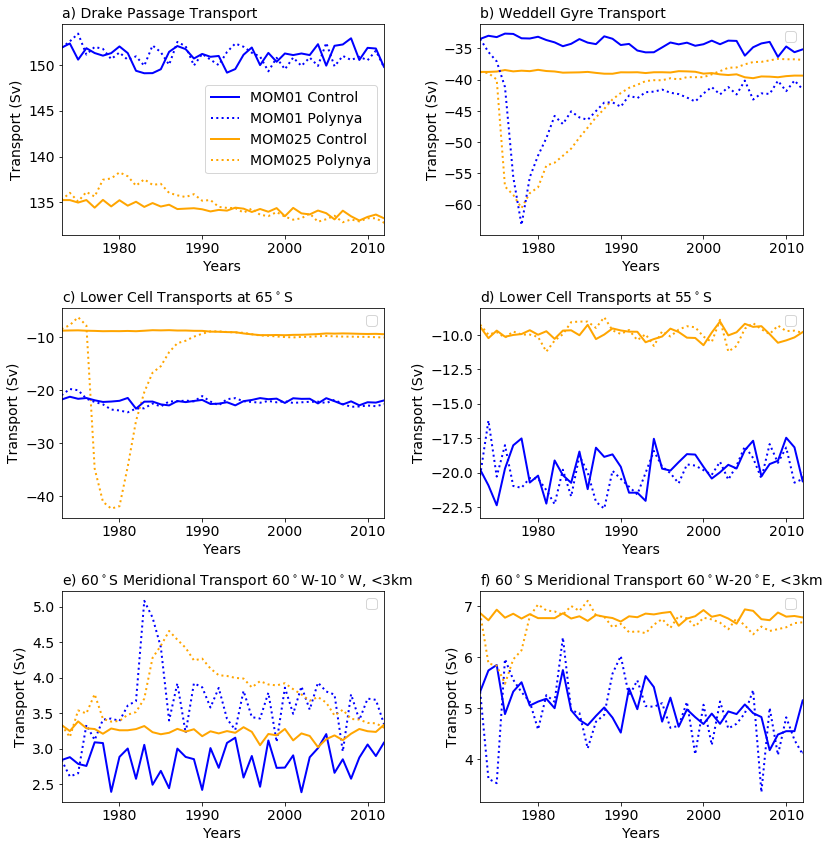

<Figure size 864x864 with 0 Axes>

In [30]:
#plot GM Net in rho space
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

fontsize=14

fig, axs = plt.subplots(3, 2)

plt.rcParams['font.size'] = fontsize

plt.figure(figsize(12,12))
wp_os=3 #1971-1974

yrs=np.arange(1973,2017,1)

ax = axs[0,0] #plt.subplot(313)
ax.plot(yrs[0:43],cntrl_dp_ts[0:43],linestyle='-',color='blue',label='MOM01 Control',linewidth=2)
ax.plot(yrs[0:43],pert_dp_ts[0:43],linestyle=':',color='blue',linewidth=2,label='MOM01 Polynya')
ax.plot(yrs[0:44],np_cntrl_dp_ts[0:44],linestyle='-',color='orange',linewidth=2,label='MOM025 Control')
ax.plot(yrs[0:44],np_pert_dp_ts[0:44],linestyle=':',color='orange',linewidth=2,label='MOM025 Polynya')
#plt.plot(yrs[0:44],nonp_lc_cntrl60_psj_ts[0+wp_os:44+wp_os],linestyle='--',color='k',linewidth=2)
#plt.plot(yrs[0:44],nonp_lc_pert60_psj_ts[0:44],linestyle='--',color='g',label='MOM025_NoNP',linewidth=2)
#plt.xlim((1037.5,1035))
ax.set_ylabel('Transport (Sv)')
ax.set_xlabel('Years')
#plt.xlim([1973,1973+12])
tit='a) Drake Passage Transport'
ax.set_title(tit,loc='left',fontsize=fontsize)
ax.legend(fontsize=fontsize)
ax.axis(xmin=1973,xmax=2012) 

ax = axs[0,1] #plt.subplot(313)
ax.plot(yrs[0:44],np_cntrl_wg_ts[0:44],linestyle='-',color='orange',linewidth=2)
ax.plot(yrs[0:44],np_pert_wg_ts[0:44],linestyle=':',color='orange',linewidth=2)
#plt.plot(yrs[0:44],nonp_lc_cntrl60_psj_ts[0+wp_os:44+wp_os],linestyle='--',color='k',linewidth=2)
#plt.plot(yrs[0:44],nonp_lc_pert60_psj_ts[0:44],linestyle='--',color='g',label='MOM025_NoNP',linewidth=2)
ax.plot(yrs[0:43],cntrl_wg_ts[0:43],linestyle='-',color='blue',linewidth=2)
ax.plot(yrs[0:43],pert_wg_ts[0:43],linestyle=':',color='blue',linewidth=2)
#plt.xlim((1037.5,1035))
ax.set_ylabel('Transport (Sv)')
ax.set_xlabel('Years')
#plt.xlim([1973,1973+12])
tit='b) Weddell Gyre Transport'
ax.set_title(tit,loc='left',fontsize=fontsize)
ax.legend(fontsize=fontsize)
ax.axis(xmin=1973,xmax=2012) 

ax = axs[1,0] #plt.subplot(313)
ax.plot(yrs[0:44],np_lc_cntrl60_psj_ts[0+wp_os:44+wp_os],linestyle='-',color='orange',linewidth=2)
ax.plot(yrs[0:44],np_lc_pert60_psj_ts[0:44],linestyle=':',color='orange',linewidth=2)
#plt.plot(yrs[0:44],nonp_lc_cntrl60_psj_ts[0+wp_os:44+wp_os],linestyle='--',color='k',linewidth=2)
#plt.plot(yrs[0:44],nonp_lc_pert60_psj_ts[0:44],linestyle='--',color='g',label='MOM025_NoNP',linewidth=2)
ax.plot(yrs[0:41],mom01_lc_cntrl60_psj_ts[0:41],linestyle='-',color='blue',linewidth=2)
ax.plot(yrs[0:41],mom01_lc_pert60_psj_ts[0:41],linestyle=':',color='blue',linewidth=2)
#plt.xlim((1037.5,1035))
ax.set_ylabel('Transport (Sv)')
ax.set_xlabel('Years')
#plt.xlim([1973,1973+12])
tit='c) Lower Cell Transports at 65$^\circ$S'
ax.set_title(tit,loc='left',fontsize=fontsize)
ax.legend(fontsize=fontsize)
ax.axis(xmin=1973,xmax=2012) 

ax = axs[1,1] #plt.subplot(313)
ax.plot(yrs[0:44],np_lc_cntrl50_psj_ts[0+wp_os:44+wp_os],linestyle='-',color='orange',linewidth=2)
ax.plot(yrs[0:44],np_lc_pert50_psj_ts[0:44],linestyle=':',color='orange',linewidth=2)
#plt.plot(yrs[0:44],nonp_lc_cntrl60_psj_ts[0+wp_os:44+wp_os],linestyle='--',color='k',linewidth=2)
#plt.plot(yrs[0:44],nonp_lc_pert60_psj_ts[0:44],linestyle='--',color='g',label='MOM025_NoNP',linewidth=2)
ax.plot(yrs[0:41],mom01_lc_cntrl50_psj_ts[0:41],linestyle='-',color='blue',linewidth=2)
ax.plot(yrs[0:41],mom01_lc_pert50_psj_ts[0:41],linestyle=':',color='blue',linewidth=2)
#plt.xlim((1037.5,1035))
ax.set_ylabel('Transport (Sv)')
ax.set_xlabel('Years')
#plt.xlim([1973,1973+12])
tit='d) Lower Cell Transports at 55$^\circ$S'
ax.set_title(tit,loc='left',fontsize=fontsize)
ax.legend(fontsize=fontsize)
ax.axis(xmin=1973,xmax=2012) 

yrs=np.arange(1973,2015,1)
print(yrs.shape)

ax = axs[2,0] #plt.subplot(313)
ax.plot(yrs,pert01_60to10[:42],linestyle=':',color='blue',linewidth=2)
ax.plot(yrs,cntrl01_60to10[:42],linestyle='-',color='blue',linewidth=2)
ax.plot(yrs,pert025_60to10[:42],linestyle=':',color='orange',linewidth=2)
ax.plot(yrs,cntrl025_60to10[:42],linestyle='-',color='orange',linewidth=2)
#plt.xlim((1037.5,1035))
ax.set_ylabel('Transport (Sv)')
ax.set_xlabel('Years')
ax.set_xlim([1974,2013])
tit='e) 60$^\circ$S Meridional Transport 60$^\circ$W-10$^\circ$W, <3km'
ax.set_title(tit,loc='left',fontsize=fontsize)
ax.legend(fontsize=fontsize)
ax.axis(xmin=1973,xmax=2012) 

ax = axs[2,1] #plt.subplot(313)
ax.plot(yrs,pert01_60to20E[:42],linestyle=':',color='blue',linewidth=2)
ax.plot(yrs,cntrl01_60to20E[:42],linestyle='-',color='blue',linewidth=2)
ax.plot(yrs,pert025_60to20E[:42],linestyle=':',color='orange',linewidth=2)
ax.plot(yrs,cntrl025_60to20E[:42],linestyle='-',color='orange',linewidth=2)
#plt.xlim((1037.5,1035))
ax.set_ylabel('Transport (Sv)')
ax.set_xlabel('Years')
ax.set_xlim([1974,2013])
tit='f) 60$^\circ$S Meridional Transport 60$^\circ$W-20$^\circ$E, <3km'
ax.set_title(tit,loc='left',fontsize=fontsize)
ax.legend(fontsize=fontsize)
ax.axis(xmin=1973,xmax=2012) 


fig.tight_layout()

of = '/g/data/v45/pas561/mom/archive/wp2_figs/Fig6_gmoc_ts.png'
fig.savefig(of,dpi=220,bbox_inches='tight')